# Lab 3-1: REINFORCE
    In this lab, you need to implement a REINFORCE algorithm with Tensorflow and solve OpenAI Gym CartPole-v0

In [1]:
from cartpole_env import *

import numpy as np
import tensorflow as tf

from collections import namedtuple, deque

# Define the data structure of experience
Experience = namedtuple('Experience', 'state action reward next_state done')

## Implement ```discount``` function to compute discounted reward

In [2]:
def discount(rewards, gamma):
    '''
    param rewards: a rewards numpy array
    param gamma: discount factor
    '''
    discounted_rewards = np.zeros_like(rewards)
    # TODO： Calculate discounted rewards
    return discounted_rewards

## Implement ```do_step``` function to collect step results

In [3]:
def do_step(env, policy):
    '''
    Collect a step from env with policy
    
    param env: RL Environment
    param policy: a function parameterized by environment state, return a action
    return a list (state, action, reward, next_state, done) with length 1
    '''        
    # Empty list
    rollout = []
    state = env.current_state()
    action = policy(state)
    next_state, reward, done, info = env.step(action)
    rollout.append(Experience(state, action, reward, next_state, done))
    state = next_state
        
    return rollout

## Implement ```ActorCriticAgent``` following ```TODO```

In [4]:
class ActorCriticAgent(object):
    def __init__(self, sess, n_states, n_actions, n_hiddens, lr_a, lr_c, gamma):
        '''
        param sess: tf session
        param n_states: dim of states
        param n_actions: dim of actions space
        param n_hiddens: dim of hidden state
        param lr_a: learning rate of actor
        param lr_c: learning rate of critic
        param gamma: discount factor
        '''
        self.sess = sess
        self.n_states = n_states
        self.n_actions = n_actions
        
        # Learning rate
        self.lr_a = lr_a
        self.lr_c = lr_c
        
        # Discount factor
        self.gamma = gamma
       
        self.state = tf.placeholder(shape=[None, n_states], dtype=tf.float32)
        self.value = tf.placeholder(shape=[None], dtype=tf.float32)
        self.action = tf.placeholder(shape=[None], dtype=tf.int32)
        
        # For value loss
        self.td_target = tf.placeholder(shape=[None], dtype=tf.float32)
        # For policy loss
        self.td_error_in = tf.placeholder(shape=[None], dtype=tf.float32)
 
        # TODO: Actor


        # TODO: Critic

        
        # TODO: TD-error

        # TODO: Value loss
           
        self.train_op_critic = tf.train.AdamOptimizer(learning_rate=self.lr_c).minimize(self.value_loss)

        # TODO: Policy loss

        self.train_op_actor = tf.train.AdamOptimizer(learning_rate=self.lr_a).minimize(self.policy_loss) 
        
    def act(self, s):
        '''
        param s: a np.ndarray with shape [n_batches, n_states]
        return a batch of actions with shape [n_batches,]
        '''
        # TODO: Softmax stochastic policy
    
    def estimate(self, s):
        '''
        param s: a np.ndarray with shape [n_batches, n_states]
        return a batch of actions with shape [n_batches,]
        '''
        # TODO: Critic output
    
    def train(self, rollout):
        '''
        param rollout: a list of experience
        '''
        states = np.array([ np.asarray(e.state) for e in rollout ])
        actions = np.reshape(np.array([ e.action for e in rollout ]), [len(states),])
        rewards = np.reshape(np.array([ e.reward for e in rollout ]), [len(states),])
        next_states = np.array([ np.asarray(e.next_state) for e in rollout ])

        value_s_next = self.estimate(next_states)
        value_s_next = np.reshape(value_s_next, [len(next_states),])

        # TODO: TD Target

        td_error, _ = self.sess.run([self.td_error_out, self.train_op_critic], feed_dict={self.state: states,
                                                                                        self.td_target: td_target})
        self.sess.run(self.train_op_actor, feed_dict={self.state: states, 
                                                    self.action: actions,
                                                    self.td_error_in: td_error})
   
        

In [5]:
LR_A = 0.001
LR_C = 0.01
GAMMA = 0.99

sess = tf.InteractiveSession()
env = CartpoleEnvironment()
agent = ActorCriticAgent(sess=sess, 
                       n_states=env.observation_space.shape[0],
                       n_actions=env.action_space.n,
                       n_hiddens=20,
                       lr_a=LR_A,
                       lr_c=LR_C,
                       gamma=GAMMA)
init = tf.global_variables_initializer()
sess.run(init)

[2017-10-16 18:18:30,373] Making new env: CartPole-v0


In [6]:
def policy(s):
    return agent.act([s])[0]

In [7]:
def eval_history_reward(history):
    arr = np.asarray(history)
    return arr.mean()

In [8]:
MAX_ITERATIONS = 500000

episode_reward = 0.0
history_episode_rewards = deque(maxlen=100)
episode = 0

plot_history_episode_rewards = []

env.reset()
for iter in range(MAX_ITERATIONS):
    rollout = do_step(env=env, policy=policy)
    agent.train(rollout=rollout)
    
    episode_reward += rollout[0].reward
    if rollout[0].done:
        history_episode_rewards.append(episode_reward)
        plot_history_episode_rewards.append(episode_reward)
        mean_rewards = eval_history_reward(history_episode_rewards)
        print('Episode %d: Reward = %f, Mean reward (over %d episodes) = %f' % (episode, 
                                                                                 episode_reward,
                                                                                 len(history_episode_rewards),
                                                                                 mean_rewards))
        env.reset()
        episode += 1
        episode_reward = 0.0
        
        if mean_rewards > 195.0:
            print('Pass')
            break

Episode 0: Reward = -9.000000, Mean reward (over 1 episodes) = -9.000000
Episode 1: Reward = -8.000000, Mean reward (over 2 episodes) = -8.500000
Episode 2: Reward = -7.000000, Mean reward (over 3 episodes) = -8.000000
Episode 3: Reward = 4.000000, Mean reward (over 4 episodes) = -5.000000
Episode 4: Reward = 9.000000, Mean reward (over 5 episodes) = -2.200000
Episode 5: Reward = 1.000000, Mean reward (over 6 episodes) = -1.666667
Episode 6: Reward = 10.000000, Mean reward (over 7 episodes) = 0.000000
Episode 7: Reward = 13.000000, Mean reward (over 8 episodes) = 1.625000
Episode 8: Reward = -11.000000, Mean reward (over 9 episodes) = 0.222222
Episode 9: Reward = -11.000000, Mean reward (over 10 episodes) = -0.900000
Episode 10: Reward = 22.000000, Mean reward (over 11 episodes) = 1.181818
Episode 11: Reward = -2.000000, Mean reward (over 12 episodes) = 0.916667
Episode 12: Reward = 2.000000, Mean reward (over 13 episodes) = 1.000000
Episode 13: Reward = 1.000000, Mean reward (over 14 

Episode 113: Reward = 13.000000, Mean reward (over 100 episodes) = 2.220000
Episode 114: Reward = -8.000000, Mean reward (over 100 episodes) = 2.070000
Episode 115: Reward = -7.000000, Mean reward (over 100 episodes) = 1.930000
Episode 116: Reward = 11.000000, Mean reward (over 100 episodes) = 2.020000
Episode 117: Reward = 11.000000, Mean reward (over 100 episodes) = 2.030000
Episode 118: Reward = 20.000000, Mean reward (over 100 episodes) = 2.320000
Episode 119: Reward = 33.000000, Mean reward (over 100 episodes) = 2.620000
Episode 120: Reward = 29.000000, Mean reward (over 100 episodes) = 2.910000
Episode 121: Reward = 9.000000, Mean reward (over 100 episodes) = 3.100000
Episode 122: Reward = 32.000000, Mean reward (over 100 episodes) = 3.420000
Episode 123: Reward = 41.000000, Mean reward (over 100 episodes) = 3.880000
Episode 124: Reward = 25.000000, Mean reward (over 100 episodes) = 4.180000
Episode 125: Reward = 33.000000, Mean reward (over 100 episodes) = 4.560000
Episode 126: 

Episode 223: Reward = -2.000000, Mean reward (over 100 episodes) = 19.720000
Episode 224: Reward = 11.000000, Mean reward (over 100 episodes) = 19.580000
Episode 225: Reward = 10.000000, Mean reward (over 100 episodes) = 19.350000
Episode 226: Reward = 8.000000, Mean reward (over 100 episodes) = 19.150000
Episode 227: Reward = -1.000000, Mean reward (over 100 episodes) = 18.890000
Episode 228: Reward = 5.000000, Mean reward (over 100 episodes) = 18.720000
Episode 229: Reward = 1.000000, Mean reward (over 100 episodes) = 18.660000
Episode 230: Reward = -4.000000, Mean reward (over 100 episodes) = 18.510000
Episode 231: Reward = -2.000000, Mean reward (over 100 episodes) = 18.390000
Episode 232: Reward = 3.000000, Mean reward (over 100 episodes) = 18.350000
Episode 233: Reward = -11.000000, Mean reward (over 100 episodes) = 18.180000
Episode 234: Reward = -5.000000, Mean reward (over 100 episodes) = 17.800000
Episode 235: Reward = -2.000000, Mean reward (over 100 episodes) = 17.480000
Ep

Episode 330: Reward = 200.000000, Mean reward (over 100 episodes) = 69.320000
Episode 331: Reward = 200.000000, Mean reward (over 100 episodes) = 71.340000
Episode 332: Reward = 200.000000, Mean reward (over 100 episodes) = 73.310000
Episode 333: Reward = 200.000000, Mean reward (over 100 episodes) = 75.420000
Episode 334: Reward = 200.000000, Mean reward (over 100 episodes) = 77.470000
Episode 335: Reward = 200.000000, Mean reward (over 100 episodes) = 79.490000
Episode 336: Reward = 200.000000, Mean reward (over 100 episodes) = 81.390000
Episode 337: Reward = 200.000000, Mean reward (over 100 episodes) = 83.380000
Episode 338: Reward = 200.000000, Mean reward (over 100 episodes) = 85.430000
Episode 339: Reward = 200.000000, Mean reward (over 100 episodes) = 87.510000
Episode 340: Reward = 200.000000, Mean reward (over 100 episodes) = 89.470000
Episode 341: Reward = 200.000000, Mean reward (over 100 episodes) = 91.300000
Episode 342: Reward = 200.000000, Mean reward (over 100 episodes

## Plot the learning curve

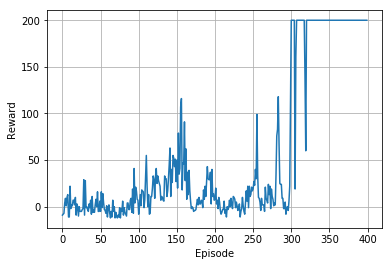

In [16]:
import matplotlib.pyplot as plt

def plot(x, y, name):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    
    ax.set(xlabel='Episode', ylabel='Reward', title=name)
    ax.grid()

    fig.savefig("%s.png" % name)
    plt.show()
    
plot(range(episode), plot_history_episode_rewards, 'Actor-Critic')

## Play the trained model

In [17]:
env.reset()
while True:
    rollout = do_step(env=env, policy=policy)
    agent.train(rollout=rollout)
    env.render()
    if rollout[0].done:
        env.reset()

ArgumentError: argument 2: <class 'TypeError'>: wrong type